# Numerical Optimization

In [362]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Golden section search:

In [363]:
def golden_section_search(f, a, b, eps=1.0e-15, n_max=500):
    """
    Finds the minimum of function using golden section search.
    Args:
        f (array_like): A strictly unimodal function on [a, b]
        a (float): Left-hand side point of the interval
        b (float): Right-hand side point of the interval
        eps (float): Error tolerance
        n_max (int): Maximum number of iterations
    Returns:
        float: A coordinate of minimum
    """
    gr = (np.sqrt(5) + 1.0) / 2.0
    n = 0
    while n <= n_max:
        c = b - (b - a) / gr
        d = a + (b - a) / gr 
        if f(c) < f(d):
            b = d
        else:
            a = c
        if abs(b - a) < eps:
            print("minimum found using", n, "iterations")
            return (a + b) / 2.0
        n += 1
    raise RuntimeError("minimum not found using", n_max, "iterations")

minimum found using 76 iterations
1.4901161227947495e-08


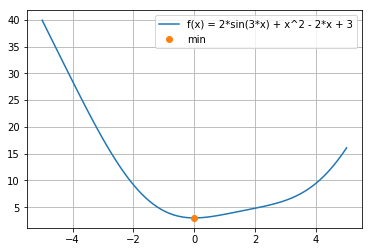

In [364]:
def f(x):
    return 2.0*np.sin(x) + x**2 - 2.0*x + 3.0

x_min = golden_section_search(f, -5.0, 5.0)
print(x_min)

x = np.linspace(-5.0, 5.0, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label="f(x) = 2*sin(3*x) + x^2 - 2*x + 3")
ax.plot(x_min, f(x_min), "o", label="min")
ax.legend()
ax.grid()

### Parabolic interpolation search:

In [365]:
def parabolic_interpolation_search(f, a, b, c, eps=1.0e-15, n_max=500):
    """
    Finds the minimum of function using parabolic interpolation search.
    Args:
        f (array_like): A strictly unimodal function on [a, b]
        a (float): Left-hand side point of the interval
        b (float): Point inside of the interval
        c (float): Right-hand side point of the interval
        eps (float): Error tolerance
        n_max (int): Maximum number of iterations
    Returns:
        float: A coordinate of minimum
    """
    n = 0
    while n <= n_max:
        x_min = b - 0.5 * ((b - a)**2 * (f(b) - f(c)) - (b - c)**2 * (f(b) - f(a))) / ((b - a)
                * (f(b) - f(c)) - (b - c)*(f(b) - f(a)))
        if f(x_min) < f(b):
            a = b
            b = x_min
        else:
            c = x_min
        if abs(c - b) < eps or abs(b - a) < eps:
            print("minimum found using", n, "iterations")
            return b
        n += 1
    raise RuntimeError("minimum not found using", n_max, "iterations")

minimum found using 33 iterations
2.3631970547807037e-09


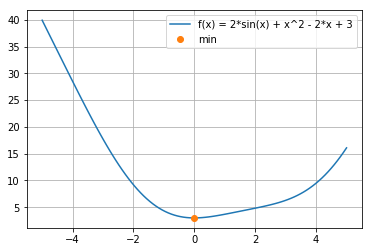

In [366]:
def f(x):
    return 2.0*np.sin(x) + x**2 - 2.0*x + 3.0

x_min = parabolic_interpolation_search(f, -7.0, -2.0, 5.0)
print(x_min)

x = np.linspace(-5.0, 5.0, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label="f(x) = 2*sin(x) + x^2 - 2*x + 3")
ax.plot(x_min, f(x_min), "o", label="min")
ax.legend()
ax.grid()

### Gradient descent:

In [356]:
def gradient_descent(f, df, x_0, step, eps=1.0e-15, n_max=500):
    """
    Finds the minimum of function using the method of gradient descent.
    Args:
        f (array_like): A strictly unimodal function on [a, b]
        df (array_like): A derivative of function f
        x_0 (float): Initial guess
        step (float): Step size multiplier
        eps (float): Error tolerance
        n_max (int): Maximum number of iterations
    Returns:
        float: A coordinate of minimum
    """
    n = 0
    while n < n_max:
        x_1 = x_0
        x_0 = x_1 - step * df(f, x_1, 1.0e-8)
        if abs(x_0 - x_1) < eps:
            print("minimum found using", n, "iterations")
            return x_0
        n += 1
    raise RuntimeError("minimum not found using", n_max, "iterations")

minimum found using 6 iterations
-8.182894362107618e-09


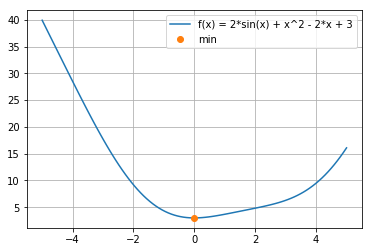

In [367]:
def f(x):
    return 2.0*np.sin(x) + x**2 - 2.0*x + 3.0

def df(f, x, h):
    return (f(x + h) - f(x)) / h

x_min = gradient_descent(f, df, -5.0, 0.5, 1.0e-15, 5000)
print(x_min)

fig, ax = plt.subplots()
ax.plot(x, f(x), label="f(x) = 2*sin(x) + x^2 - 2*x + 3")
ax.plot(x_min, f(x_min), "o", label="min")
ax.legend()
ax.grid()

In [447]:
def gradient_descent_2d(f, df_dx, df_dy, x_0, y_0, step, eps=1.0e-15, n_max=500):
    n = 0
    while n < n_max:
        x_1 = x_0
        y_1 = y_0
        x_0 = x_1 - step * df_dx(f, x_1, y_1, 1.0e-8)
        y_0 = y_1 - step * df_dy(f, x_1, y_1, 1.0e-8)
        if abs(x_0 - x_1) < eps and abs(y_0 - y_1) < eps:
            print("minimum found using", n, "iterations")
            return x_0, y_0
        n += 1
    raise RuntimeError("minimum not found using", n_max, "iterations")

minimum found using 130 iterations
-1.2567286743153616 0.5392089423522606


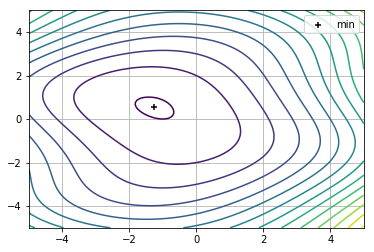

In [472]:
def f(x, y):
    return (x + 1)**2 + y**2 + x*np.sin(y)

def df_dx(f, x, y, h):
    return (f(x + h, y) - f(x, y)) / h

def df_dy(f, x, y, h):
    return (f(x, y + h) - f(x, y)) / h

x_min, y_min = gradient_descent_2d(f, df_dx, df_dy, -5.0, 5.0, 0.1)
print(x_min, y_min)

x_axis = np.linspace(-5.0, 5.0, 100)
y_axis = np.linspace(-5.0, 5.0, 100)
x, y = np.meshgrid(x_axis, y_axis)

fig, ax = plt.subplots()
ax.contour(x, y, f(x, y), 15)
ax.scatter(x_min, y_min, color="black", marker="+", label="min")
ax.legend()
ax.grid()